## Ejemplo red clasificadora

### Esta es una red clasificadora básica, que se entrena con un dataset (en este caso, de imágenes de 28x28 pixeles) para realizar predicciones sobre elementos similares al dataset. Este modelo evalúa elementos según alguna característica entregada por el dataset. En este ejemplo usamos fashion_mnist. La característica entregada es la prenda de ropa que corresponde a la imagen, asociado a un valor numérico (Ej: Pantalones -> 1).

### Primero crearemos nuestro modelo  

In [1]:
import tensorflow as tf  # Importamos tensorflow
import datetime
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_resource_variables()
mnist = tf.keras.datasets.fashion_mnist # Acá puedes poner cualquier dataset de imágenes que quieras
# clasificar, ejemplos son mnist y fashion_mnist


# definimos el dataset que usaremos y normalizamos las imágenes.
(image_train, label_train), (image_test, label_test) = mnist.load_data()   # Imágenes de 28x28 pixeles
image_train = tf.keras.utils.normalize(image_train, axis=1) # label es la característica o tipo de esa imagen 
image_test = tf.keras.utils.normalize(image_test, axis=1)

#Elegimos un modelo secuencial, que nos deja crear una estructura de red por capas
model = tf.keras.models.Sequential() 
#Convertimos las imágenes de matrices 28x28 a vectores de 784 elementos
model.add(tf.keras.layers.Flatten())   
# Agregamos nuestras capas, dos capas ocultas y una de salida. La capa de entrada la definimos con input_shape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= image_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


#Usaremos Adam: Adaptive moment estimation como nuestro optimizador. Sirve como default en muchas redes
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', #El loss es la función que la red busca minimizar 
              metrics=['accuracy'])

In [2]:
# Entrenamos el modelo
callback_val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback_val_accuracy = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
history = model.fit(image_train, label_train, epochs=10,validation_data=(image_test, label_test), callbacks = [callback_val_accuracy, callback_val_loss])  

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4844 - accuracy: 0.8227 - val_loss: 0.4233 - val_accuracy: 0.8436
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3578 - accuracy: 0.8663 - val_loss: 0.3823 - val_accuracy: 0.8574
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3199 - accuracy: 0.8800 - val_loss: 0.3882 - val_accuracy: 0.8579
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2968 - accuracy: 0.8885 - val_loss: 0.3526 - val_accuracy: 0.8738
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2789 - accuracy: 0.8950 - val_loss: 0.3519 - val_accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2603 - accuracy: 0.9009 - val_loss: 0.3395 - val_accuracy: 0.8792
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2491 - accuracy: 0.9058 - val_loss: 0.3388 - val_accuracy:

### Nuestro modelo es una DNN (dense neural network), esto significa que todas las neuronas de una capa están conectadas con todas las neuronas de la capa siguiente. Esto le permite a nuestro modelo encontrar patrones con toda la información disponible, y descartar conexiones innecesarias cambiando los pesos a casi 0. Trainable params se refiere a los pesos que aplica cada neurona a su entrada para obtener la salida, que son lo que varia en el modelo al entrenar. La cantidad de trainable params es igual a Total params, pues en esta red no usamos bias.

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Acá evaluamos la eficacia de nuestro modelo según los parámetros de exactitud (accuracy) y perdida (loss)

313/313 - 1s - loss: 0.3536 - accuracy: 0.8779


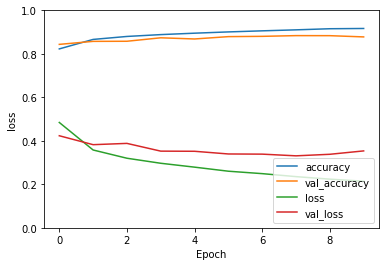

In [4]:
# Evaluamos nuestro modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(image_test,  label_test, verbose=2)

### Accuracy y loss representan que tan pocos errores tuvo la red con las imágenes de entrenamiento, val_accuracy y val_loss son lo mismo para imágenes nuevas. Si existe una diferencia muy notoria entre estos valores, suele significar que se produjo overfitting, es decir que la red memorizó los elementos de entrenamiento y es un riesgo de entrenar por muchas epochs.

In [5]:
model.save('epic_num_reader.model') #para guardar el modelo
# El siguiente error se debe a una un cambio en como funciona TensorFlow de la versión 1.0 a 2.0, no afecta
# el funcionamiento del modelo.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [6]:
model = tf.keras.models.load_model('epic_num_reader.model') #Para volver a cargarlo


### Ahora crearemos predicciones para las imágenes de testeo. Veremos como la red clasifica estas imágenes.

In [7]:
predictions = model.predict(image_test) #Creamos predicciones para un batch de testeo

In [8]:
# Las predicciones son vectores de numeros entre 0 y 1, que representan la certeza de la red respecto a 
#la clasificación de la imagen. La clasificación asociada a una imagen es el valor de máxima certeza.
print(predictions) 

[[7.08097581e-09 1.56829008e-10 7.05016845e-09 ... 6.73581194e-03
  5.13359875e-11 9.93262947e-01]
 [2.50518147e-04 4.75933915e-09 9.98499632e-01 ... 6.76203052e-11
  6.20098533e-08 9.85865167e-10]
 [1.03024809e-06 9.99998569e-01 1.89444987e-10 ... 1.07226443e-16
  3.44515456e-07 5.18851319e-14]
 ...
 [1.67833423e-05 1.77255974e-10 2.76060155e-06 ... 3.00593221e-08
  9.99677896e-01 2.88646381e-11]
 [6.45311049e-09 1.00000000e+00 1.44884715e-10 ... 4.69662659e-15
  5.32309024e-08 3.94728060e-13]
 [3.72120240e-07 2.59396842e-07 1.03008917e-08 ... 6.21231913e-04
  8.83429038e-06 2.25341637e-07]]


In [9]:
n = 9
print(np.argmax(predictions[n]))
#Imprimimos la clasificacion de maxima certeza para el elemento n

7


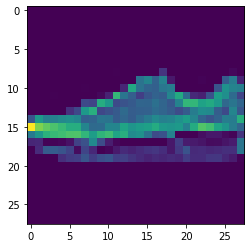

In [10]:
# Esta es la imagen asociada al elemento n
plt.imshow(image_test[9])
plt.show()

### Acá se puede ver cual es la clasificación de las imágenes, para verificar si la predicción de la red fue correcta. En el ejemplo utilizamos el elemento numero 9, que tiene un valor de 7. Podemos ver en esta tabla que 7 representa a las zapatillas. 

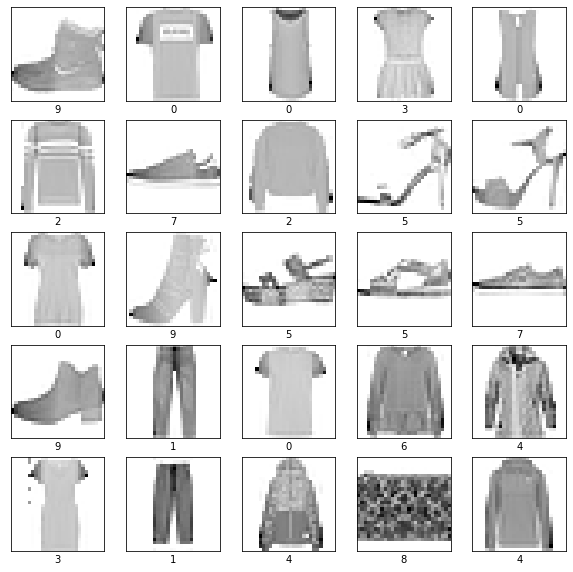

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_train[i])
plt.show()